In [1]:
from data_utils import get_CIFAR10_data
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer,Input
from tensorflow.python.keras.layers import Reshape,MaxPooling2D
from tensorflow.python.keras.layers import Conv2D,Dense,Flatten

from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

/home/paperspace/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Load the (preprocessed) CIFAR10 data.

data = get_CIFAR10_data()
for k, v in data.items():
  print('%s: ' % k, v.shape)

X_train:  (49000, 3, 32, 32)
y_train:  (49000,)
X_val:  (1000, 3, 32, 32)
y_val:  (1000,)
X_test:  (1000, 3, 32, 32)
y_test:  (1000,)


In [3]:
X_train=data['X_train']
y_train=data['y_train']
X_val=data['X_val']
y_val=data['y_val']
X_test=data['X_test']
y_test=data['y_test']

In [4]:
y_train=to_categorical(data['y_train'],num_classes=10)
y_val=to_categorical(data['y_val'],num_classes=10)
y_test=to_categorical(data['y_test'],num_classes=10)

In [5]:
#normalizing X
X_train = X_train.astype('float32')
X_val= X_val.astype('float32')
X_test = X_test.astype('float32')

X_val/=255.0
X_train /= 255.0
X_test /= 255.0

In [6]:
X_train=np.reshape(X_train,(-1,32,32,3))

In [7]:
X_val=np.reshape(X_val,(-1,32,32,3))
X_test=np.reshape(X_test,(-1,32,32,3))

In [8]:

model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1:])))
model.add(Conv2D(kernel_size=5,strides=1,filters=16,padding='same',activation='relu',name='Conv-1'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Flatten())
model.add(Dense(512,activation='relu',name='dense-1'))
model.add(Dense(10,activation='softmax',name='dense-2'))


In [ ]:

model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1:])))
model.add(Conv2D(kernel_size=5,strides=1,filters=32,padding='same',activation='relu',name='Conv-1'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(kernel_size=5,strides=1,filters=64,padding='same',activation='relu',name='Conv-2'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Flatten())

model.add(Dense(1024,activation='relu',name='dense-1'))
model.add(Dense(10,activation='softmax',name='dense-2'))


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
Conv-1 (Conv2D)              (None, 32, 32, 16)        1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense-1 (Dense)              (None, 512)               2097664   
_________________________________________________________________
dense-2 (Dense)              (None, 10)                5130      
Total params: 2,104,010
Trainable params: 2,104,010
Non-trainable params: 0
_________________________________________________________________


In [10]:
X_train.shape

(49000, 32, 32, 3)

In [11]:
from tensorflow.python.keras.optimizers import Adam
optimizer=Adam(lr=1e-4,decay=1e-6)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [129]:
model.fit(x=X_train,y=y_train,num_classes=10,epochs=5,batch_size=64)

Epoch 1/5
49000/49000 [==============================]49000/49000 [==============================] - 81s 2ms/step - loss: 2.1355 - acc: 0.2329

Epoch 2/5
49000/49000 [==============================]49000/49000 [==============================] - 79s 2ms/step - loss: 1.9616 - acc: 0.2974

Epoch 3/5
49000/49000 [==============================]49000/49000 [==============================] - 97s 2ms/step - loss: 1.8943 - acc: 0.3262

Epoch 4/5
49000/49000 [==============================]49000/49000 [==============================] - 91s 2ms/step - loss: 1.8249 - acc: 0.3543

Epoch 5/5
49000/49000 [==============================]49000/49000 [==============================] - 80s 2ms/step - loss: 1.7669 - acc: 0.3706



In [12]:

data_augmentation=True
steps=int(X_train.shape[0]/64)
steps

765

In [13]:
from keras.preprocessing.image import ImageDataGenerator

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,validation_data=(x_test, y_test),shuffle=True)

else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
   # IT just computes the new generated images right now.
    datagen.fit(X_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(X_train, y_train,batch_size=64),epochs=20,validation_data=(X_val, y_val),workers=1,
                       steps_per_epoch=steps)


Using real-time data augmentation.
Epoch 1/20
765/765 [==============================] - 19s 24ms/step - loss: 1.9060 - acc: 0.3122 - val_loss: 1.6535 - val_acc: 0.4120
Epoch 2/20
765/765 [==============================] - 15s 20ms/step - loss: 1.7465 - acc: 0.3709 - val_loss: 1.5745 - val_acc: 0.4480
Epoch 3/20
765/765 [==============================] - 16s 20ms/step - loss: 1.6917 - acc: 0.3952 - val_loss: 1.5270 - val_acc: 0.4850
Epoch 4/20
765/765 [==============================] - 15s 20ms/step - loss: 1.6443 - acc: 0.4150 - val_loss: 1.4797 - val_acc: 0.4870
Epoch 5/20
765/765 [==============================] - 16s 20ms/step - loss: 1.6189 - acc: 0.4261 - val_loss: 1.4079 - val_acc: 0.4930
Epoch 6/20
765/765 [==============================] - 15s 20ms/step - loss: 1.5917 - acc: 0.4357 - val_loss: 1.4286 - val_acc: 0.4960
Epoch 7/20
765/765 [==============================] - 16s 21ms/step - loss: 1.5684 - acc: 0.4420 - val_loss: 1.3910 - val_acc: 0.5180
Epoch 8/20
765/765 [=======

In [16]:
#since learning is a bit slow. Reinitialized the lr.
optimizer=Adam(lr=1e-4,decay=1e-6)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model.fit_generator(datagen.flow(X_train, y_train,batch_size=64),epochs=1,validation_data=(X_val, y_val),workers=1,
                       steps_per_epoch=steps)


Epoch 1/1
765/765 [==============================] - 16s 21ms/step - loss: 1.3657 - acc: 0.5175 - val_loss: 1.2413 - val_acc: 0.5600


In [161]:
model.fit_generator(datagen.flow(X_train, y_train,batch_size=64),epochs=1,validation_data=(X_val, y_val),workers=1,
                       steps_per_epoch=steps)


Epoch 1/1
765/765 [==============================]765/765 [==============================] - 87s 114ms/step - loss: 1.8510 - acc: 0.3255 - val_loss: 1.6936 - val_acc: 0.4060



In [172]:
import math
def plot_conv_weights(weights,input_channel=0):
    
    w=weights
    
    w_min=np.min(w)
    w_max=np.max(w)
    
    num_filters=w.shape[3]
    
    num_grids=math.ceil(math.sqrt(num_filters))
    
    fig,axes=plt.subplots(num_grids,num_grids)
    
    for i,ax in enumerate(axes.flat):
        if i<num_filters:
            img=w[:,:,input_channel,i]
            
            ax.imshow(img,vmin=w_min,vmax=w_max,interpolation='nearest',cmap='seismic')

    ax.set_xticks([])
    ax.set_yticks([])
    
    plt.show()

In [173]:
layer_conv1=model.layers[1]
weights_conv1=layer_conv1.get_weights()[0]

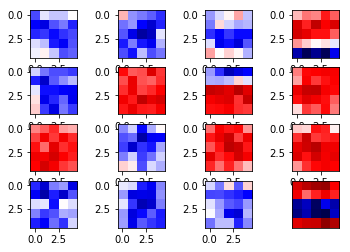

In [174]:
plot_conv_weights(weights_conv1)

In [162]:
accuracy=model.evaluate(x=X_val,y=y_val)
print('loss:{},   accuracy:{}'.format(float(accuracy[0]),accuracy[1]*100))

1000/1000 [==============================]1000/1000 [==============================] - 1s 580us/step

loss:1.6935678024291991,   accuracy:40.6
